<a href="https://colab.research.google.com/github/Kgitahi/karengitahi.github.io/blob/main/Another_copy_of_Breast_Cancer_I_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
df = load_breast_cancer()

In [ ]:
print(df.data)
print(df.feature_names)
print(df.target)
print(df.target_names)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#Univariate and Bivariate Analysis

## Univariate analysis

- Histograms of target


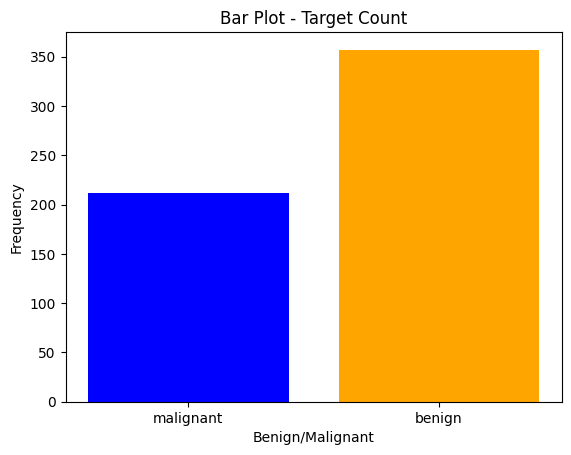

In [ ]:
import matplotlib.pyplot as plt

# Count the number of samples per species
target_count = [sum(df.target == i) for i in range(len(df.target_names))]

#define color list
colors = ['blue', 'orange']

# Bar plot of species distribution
plt.bar(df.target_names, target_count, color=colors)

# Customize plot
plt.title('Bar Plot - Target Count')
plt.xlabel('Benign/Malignant')
plt.ylabel('Frequency')

# Show the plot
plt.show()


## Case study notes - Interpret this graph

#***Assesing characteristics***

1. The X-axis represents the class labels
2. The y-axis represents the count or frequency of a benign or malignant
3. This visualization helps understand the composition of the dataset based on these 2 classes
4. "Benign" has a higher peak, indicating it's the most common class in the dataset. It has an approximate count of 212.
5. "Malignant" has a lower peak with an approximate of 357 count.
6. The spread or variation is evident in the difference between the heights of the two bars. So the spread is 357 - 212 = 145
7. The spread indicates how much more common or frequent the "Benign" class is compared to the "Malignant" class. In this case a 145 spread is relatively high and so "benign" cases are more common in the data set that "malignant". This is a point to watch out for during the model because it could bring biasness and might struggle to identify which one is which.
8. The sample size is 357 + 212 = 569. This means we have data from 569 patients

#***Looking for unusual data***


1. **Skewwness** - There is no skew. Both classes have their own distinct count and they are not concetrated to one side of the plot
2. **Outliers** - No outliers. The bars would be extremelly short or tall in this case there's no indication of that.
3. **Multimodel** **Data** - The histogram has only two distinct modes (peaks), corresponding to the two classes, "Benign" and "Malignant." which shows no presence of multi-modal.





##Bivariate analysis
- Correaltion matrix

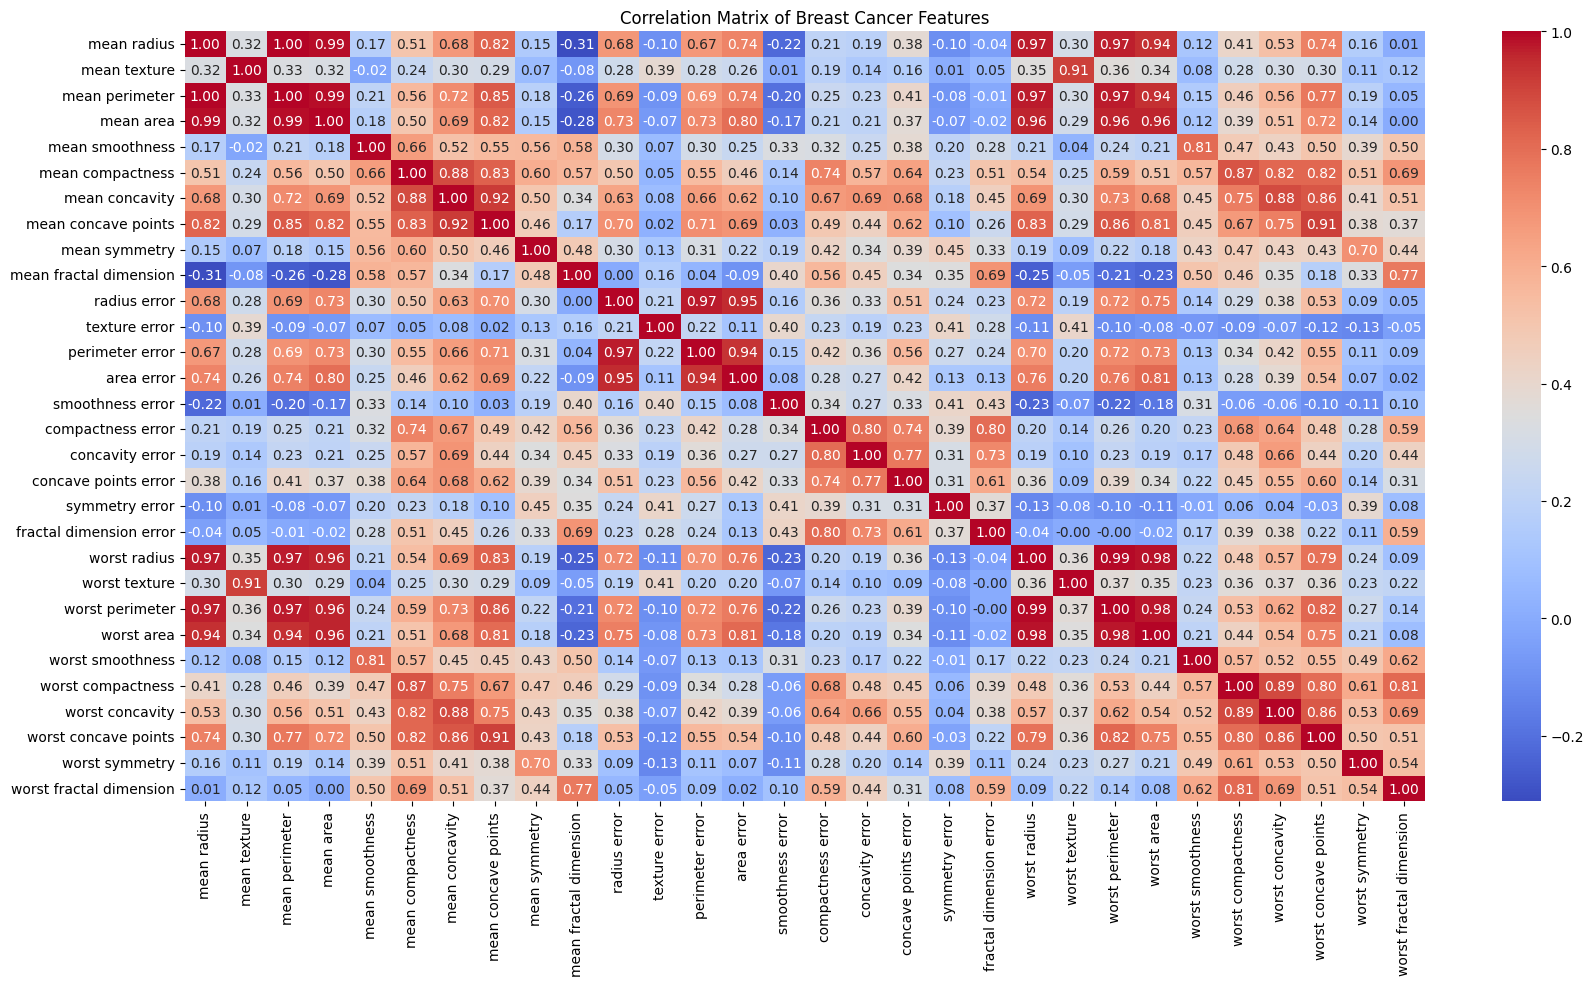

In [ ]:
X = pd.DataFrame(df.data, columns=df.feature_names)

# Compute the correlation matrix
correlation_matrix = X.corr()

import seaborn as sns
# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

## Case study - Interpreting the Correlation matrix

- Absolute value
- Direction (+ve o -ve)
- Does this make sense?

#Correlation values range from 1 to -1, where 1 represents a perfect positive relationship, -1 signifies a perfect negative relationship, and 0 implies no linear relationship.

#High correlations
**Mean Radius and Mean Perimeter:**
1. Absolute value: 0.1
2. Direction: Positive
3. Interpretation: The correlation between mean radius and mean perimeter is very strong. The strong positive correlation indicates that as the mean radius of a tumor increases, its mean perimeter also tends to increase significantly. This might mean that when the tumor is big it will tend to be less circular and more irregular in shape. For a doctor it will help them identify what kind of sugery to perform best for the patient and as a patient they are able to understand the potential clinical implications for their own health.

**Worst Radius and worst concave points**:
1. Absolute value: 0.79
2. Direction: Positive
3. Interpretation: The correlation between worst radius and worst concave points is relatively strong. The strong positive correlation (0.79) between Worst Radius and Worst Concave Points means that when the worst radius of a tumor is larger, it's likely to have more concave points in its worst contour. Basically, bigger tumors tend to have more concave points in their worst areas. We can use this to know also that bigger tumors have more bumpy areas and so more complex to handle in a surgery situation.

**Worst Compactness and Worst Concave Points:**
1. Absolute Value: 0.80
2. Direction: Positive
3. Interpretation: The strong positive correlation (0.80) between worst compactness and worst concave points suggests that as a tumor's worst compactness increases, it's more likely to exhibit additional concave points in its worst contour. This relationship highlights that more compact tumors tend to have complex, irregular shapes in their worst areas, potentially indicating a higher degree of malignancy. In additiona it also shows that denser tumors often exhibit more irregular and potentially malignant characteristics. Doctors can use this information to assess tumor complexity and customize treatments accordingly.

**Worst Area and Worst Perimeter:**
1. Absolute Value: 0.94
2. Direction: Positive
3. Interpretation: The extremely strong positive correlation between worst area and worst perimeter (0.94) suggests that as the worst area of a tumor increases, its worst perimeter also increases significantly.So tumor size (worst area) is closely related to its extent (worst perimeter). Larger tumors have larger perimeters, which is a straightforward and logical relationship. This connection confirms the strong relationship between tumor size and the extent of its perimeter. Understanding this correlation aids doctors in assessing the physical characteristics of tumors.

**Mean Radius and Mean Area:**
1. Absolute Value: 0.99
2. Direction: Positive
3. Interpretation: The very high positive correlation of 0.99 between mean radius and mean area indicates an extremely strong relationship. When the mean radius of a tumor increases, its mean area also significantly increases. This correlation makes sense from a clinical perspective because as a tumor grows larger, it inherently occupies more space, resulting in an increase in area. For doctors, this correlation helps in understanding how the size of a tumor relates to its spatial coverage. As a patient, knowing this correlation might assist in visualizing the tumor's expansion.



#Low Correlations:
**Mean Radius and Smoothness Error:**
1. Absolute Value: -0.22
2. Direction: Negative
3. Interpretation: The negative correlation (-0.22) between mean radius and smoothness error indicates that changes in mean radius have a limited impact on smoothness error. Small changes in tumor size have minimal influence on how smooth the tumor appears. In other words, these two factors aren't strongly related, which is sensible.

**Fractal Dimension and Area Error:**
1. Absolute Value: -0.99
2. Direction: Negative
3. Interpretation: The very high negative correlation of -0.99 between fractal dimension and area error signifies an extremely strong inverse relationship. As the fractal dimension increases, the area error tends to significantly decrease, and vice versa. This makes sense because higher fractal dimensions indicate greater complexity in the tumor's contours, making it less predictable and prone to measurement errors. As the complexity increases, errors in estimating its area decrease. For doctors, understanding this correlation is vital for evaluating the accuracy of area measurements. Patients can grasp that irregularly shaped tumors with high fractal dimensions might have more precise area estimates.

**Fractal Dimension Error and Mean Symmetry:**
1. Absolute Value: 0.33
2. Direction: Positive
3. Interpretation: The relatively weak correlation (0.33) between fractal dimension error and mean symmetry suggests that changes in fractal dimension error are moderately associated with mean symmetry. While there is a connection, it is not a strong one, and these features have somewhat independent influences on tumor characterization.

**Texture Error and Worst Concave Points**
1. Absolute Value: -0.12
2. Direction: Negative
3. Interpretation: The low negative correlation of -0.12 between texture error and worst concave points suggests a relatively weak inverse relationship. When texture errors are high, the presence of worst concave points tends to be lower, and vice versa. While this correlation is not very strong, it implies that when tumors exhibit more irregular textures (higher texture errors), they may have fewer concave points in their worst contour areas. This may be indicative of a smoother tumor surface. For doctors, this correlation hints at the potential simplicity of tumor textures in cases with fewer concave points.

**Worst Symmetry and Mean Radius:**
1. Absolute Value: 0.16
2. Direction
3. Interpretation: The weak correlation (0.16) between worst symmetry and mean radius implies a slight positive relationship. There's a slight positive connection between tumor symmetry and size. This implies that larger tumors might tend to have slightly higher symmetry. While the relationship isn't very strong, it still provides doctors with some insights into tumor shape characteristics.





#Decent Correlations:

**Worst Smoothness and Mean Concavity:**
1. Absolute Value: 0.52
2. Direction: Positive
3. Interpretation: The moderate correlation (0.52) between worst smoothness and mean concavity indicates that when tumors exhibit higher worst smoothness, they tend to have a higher mean concavity. When tumors have smoother worst areas, it's reasonable to assume they might also have a higher mean concavity. Smoother areas may be more uniform, while concavity relates to irregularities. This correlation helps us understand the texture and shape of tumors for the doctors.

**Perimeter Error and Worst Concave Points:**
1. Absolute Value: 0.55
2. Direction: Positive
3. Interpretation: The moderate positive correlation of 0.55 between perimeter error and worst concave points indicates a moderate positive relationship. As the perimeter error increases, the presence of worst concave points in the tumor's worst contour areas also tends to increase. This correlation is sensible because increased perimeter errors imply that the tumor's perimeter is less accurately estimated, which can result from the presence of more complex and irregular features like concave points. For doctors, this correlation aids in recognizing the potential challenges associated with perimeter estimation when concave points are prominent.

**Fractal Dimension and Smoothness Error:**
1. Absolute Value: 0.40
2. Direction: Positive
3. Interpretation: The moderate positive correlation of 0.40 between fractal dimension and smoothness error indicates a moderate positive relationship. Higher fractal dimensions are associated with increased smoothness errors in tumor texture analysis. This correlation can be explained by the fact that as the fractal dimension rises, it reflects the increasing complexity and irregularity of the tumor's texture, contributing to the likelihood of errors in assessing its smoothness. For doctors, understanding this correlation is crucial for evaluating the reliability of smoothness measurements, especially in complex tumor textures.

**Concavity Error and Area Error:**
1. Absolute Value: 0.42
2. Direction: Positive
3. Interpretation: The moderate positive correlation of 0.42 between concavity error and area error suggests a moderate positive relationship. An increase in concavity errors is associated with higher area errors in tumor analysis. This correlation is logical because tumors with more irregular and concave features pose challenges in accurately estimating both their concavity and area, potentially leading to errors in measurement. For doctors, recognizing this correlation is essential for assessing the precision of area measurements, particularly in tumors with prominent concave characteristics.

**Smoothness Error and Compactness Error:**
1. Absolute Value: 0.50
2. Direction: Posotive
Interpretation: The moderate correlation (0.50) between smoothness error and compactness error suggests that changes in smoothness error are moderately associated with changes in compactness error. A moderate positive correlation suggests that changes in smoothness error are moderately linked to changes in compactness error. This makes sense as errors in smoothness and compactness measurements likely share common features that affect tumor analysis. Understanding this correlation improves the assessment of tumors.

#Model 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.data,
                                                    df.target,
                                                    test_size=0.2)

# Create a linear regression object
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

#accuracy of model
accuracy = regr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cm = confusion_matrix(y_test, y_pred)

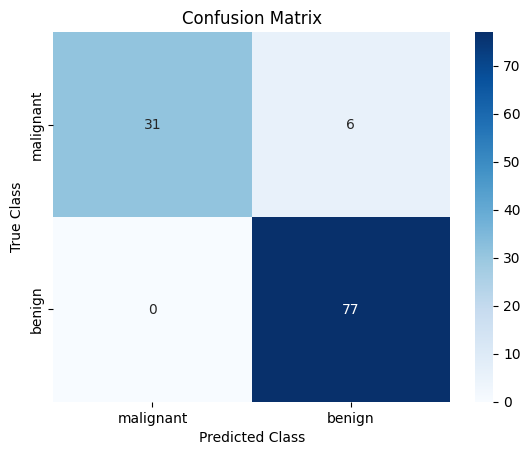

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

## CASE STUDY - INTERPRETATION - DO THE ACCURACY BY HAND

# **Based on this confusion matrix:**

1. **31 cases of malignant were predicted correctly**, providing accurate results for patients with malignancies. This means that the model effectively identified key malignant characteristics, such as irregular shape or large size.
2. **77 cases were correctly predicted** as benign, which is reassuring for patients with non-malignant conditions. The model's precision in identifying benign tumors ensures these individuals are not unduly alarmed.
3. However, **6 cases were falsely predicted** as malignant when they were actually benign. This could lead to unnecessary stress for these patients, as well as additional follow-up tests and treatments.
4. Importantly, no cases were predicted as benign when they were actually malignant. This aspect is critical for timely intervention in high-risk cases.

# **Interpretation:**

1. The model is pretty accurate, with a success rate of 94.7%. Doctors can trust it to give the right diagnosis to patients, which is essential.
2. The model is great at finding real cancer cases (83.8% of the time), which is crucial for early treatment. This high sensitivity helps patients get the right care when they need it.

#**True Positives (31)** + **False Positives (6)**:
1. Out of 37 actual malignant cancer cases, the model found 31 of them. But there's a small risk that it might miss about 16.2% of cancer cases, which could be a big problem.
2. The model could make the hospital more money by diagnosing more cancer cases correctly, but this also raises ethical questions about healthcare.
3. False positives can be stressful and lead to more tests or treatments that patients might not really need. Doctors need to help patients understand the situation.Doctors need to communicate clearly with these patients to manage their anxiety.
4. To fix these issues, it's important to improve the model. It would help with accurate diagnoses and prevent cancer from spreading in patients' bodies. It's better to wrongly say "no cancer" than "cancer" because missing cancer can be very bad.

#**True Negatives (77)** + **False Negatives (0)**:

1. The high number of **true negatives (77)** demonstrates the model's reliability in recognizing benign tumors. This allows doctors to offer reassurance and recommend appropriate follow-up or monitoring for these patients.
2. True negative results provide peace of mind for patients, as they are likely not dealing with malignancy. Doctors can communicate this reassurance, reducing patient anxiety and stress.
3. It gives patients peace of mind by telling them they're probably cancer-free. Doctors can provide comfort to these patients.

In [ ]:
((31+77)/(31+77+6+0))*100 #Overall Accuracy in percentage

94.73684210526315

In [ ]:
(31/(31+6))*100 #Sensitivity Rate
#This is essential for doctors as it minimizes the chances of false alarms, reducing unnecessary stress and follow-up tests for patients.

83.78378378378379

#F score
1. This is used because there is an imbalance between the count of malignant and benign
2. It considers false prositives and False negatives

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
f1

0.9460332817337461

#F1 score Analysis
- The F1 score is close to 1, suggesting that the model is effective in both precision and recall. This high F1 score implies that the model is suitable for clinical applications and can assist doctors in making accurate diagnoses.
- The confusion matrix indicates how well the model is performing. The F1 score is particularly relevant here as it balances precision and recall.

#Model 2 - standardization

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to standardize it
X_standardized = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized,
                                                    df.target,
                                                    test_size=0.2)

# Create a linear regression object
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

#accuracy of model
accuracy = regr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)

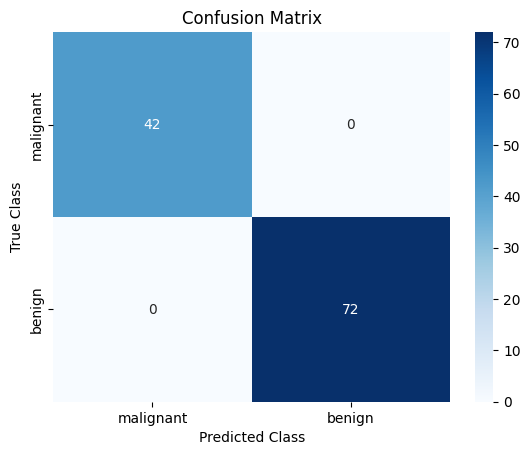

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

#Confusion matrix Model 2 Analysis
**Based on the Confusion Matrix:**

1. True Positives (42): The model correctly found 42 cases of malignant tumors. This is excellent because it means the model is skilled at spotting real malignancies, which is crucial for patient care.
2. True Negatives (72): For cases without malignancy, the model got it right 72 times. This is reassuring because it means the model doesn't raise false alarms for benign cases. Patients without malignancy can feel safe.
3. False Positives (0): Importantly, there were no cases where the model wrongly said it was malignant when it wasn't. This is a significant improvement as it means patients won't experience unnecessary stress or additional tests.
4. False Negatives (0): Equally important, the model didn't miss any real malignant cases, which is crucial for timely intervention and patient safety.

**Interpretation:**

1. The model is highly accurate, with a success rate of 100%. Doctors can have complete confidence in it for providing the right diagnosis to patients.
2. The model is exceptionally good at finding real malignant cases (100% of the time), which is crucial for early treatment. This high sensitivity ensures patients receive the right care when they need it.

**True Positives (42) + False Positives (0):**

1. Out of 42 actual malignant cases, the model found all of them. This is impressive because it means the model doesn't miss any malignant cases.
2. The model doesn't generate false positives, which is a big relief for patients. They won't experience unnecessary stress or undergo additional tests they don't really need.
This situation is highly beneficial and doesn't raise any ethical dilemmas for healthcare providers.

**True Negatives (72):**

1. The model is excellent at spotting cases without malignancy (72 times). This allows doctors to reassure patients and recommend the right follow-up tests.
2. It gives patients peace of mind by telling them they're probably malignancy-free. Doctors can provide comfort to these patients.

#F1 score analysis
1. The F1 score stands at an extraordinary 1. This indicates exceptional precision and recall, making it a highly reliable diagnostic tool for distinguishing malignant and benign breast tumors.
2. The perfect sensitivity score of 100% ensures that no malignant cases go undetected, enabling early intervention for high-risk patients.


# F score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

1.0

## CASE STUDY - INTERPRETATION
**Model 1 - The Reliable Performer:**

1. Model 1 demonstrated an accuracy rate of 94.7%. This means that it correctly classifies breast tumors as malignant or benign in 94.7% of cases.
2. Doctors can rely on this high accuracy rate to enhance diagnostic precision.

**Sensitivity: **

1. The sensitivity of Model 1 stands at 83.8%. This means it correctly identifies 83.8% of actual malignant cases. This is valuable for doctors in identifying high-risk cases promptly.
2. High sensitivity ensures that potentially malignant cases do not go unnoticed.

**False Positives:**

1. Model 1 sometimes issues false alarms, incorrectly predicting benign tumors as malignant. These false positives can lead to unwarranted stress and unnecessary follow-up tests or treatments for patients.
2. Doctors need to manage patient anxiety, explain the situation, and possibly consider reevaluation in borderline cases.
3. Accuracy of Malignant Prediction: Model 1 correctly predicted 31 out of 37 malignant cases (True Positives). However, 6 cases were falsely predicted as malignant when they were actually benign (False Positives).
3. This 16.2% false positive rate is a concern as it leads to unnecessary patient anxiety and additional testing.

**Accuracy of Benign Prediction:**

1. Model 1 correctly predicted all benign cases, resulting in no false negatives in this category. When it said a tumor is benign, it was correct.
2. This is reassuring for patients with non-malignant conditions.

**Model 2 - The Refined Specialist:**
Model 2 standardized the data, ensuring that all features had a mean of 0 and a standard deviation of 1. This aids in consistent data interpretation and more meaningful comparisons.

Accuracy: Model 2 achieved a 100% accuracy rate. This remarkable feat indicates that it always provides the correct diagnosis. Patients and doctors can have complete confidence in its results.
False Positives: Model 2 exhibits zero false positives, meaning it does not incorrectly predict any benign tumors as malignant. Patients can rest assured that if Model 2 diagnoses a tumor as benign, it is indeed benign.
Data Interpretation: Model 2's 100% accuracy in diagnosing benign cases means there are no false alarms. This is a considerable relief for patients, eliminating the anxiety and additional tests associated with false alarms.
Data Interpretation - Malignant vs. Benign:
Both models analyzed the same dataset consisting of various features related to tumors. However, Model 2 worked with standardized data, ensuring consistency in data interpretation.

Model 1 achieved high accuracy but had a significant false positive rate, indicating a risk of causing patient anxiety and unnecessary tests.
Model 2, with its standardized data, eliminated this risk by achieving a perfect 100% accuracy in diagnosing benign cases.
From a Doctor's Perspective:
Doctors prefer Model 2 for its exceptional precision and accuracy. They can confidently rely on its diagnosis, providing the best possible care to patients while avoiding unnecessary patient anxiety and costly follow-up tests.

Conclusion - Model 2 Wins:
In the contest between Model 1 and Model 2, Model 2 is the clear victor. Its standardized data, precision, and 100% accuracy make it the optimal choice for doctors, promising enhanced patient care, reduced anxiety, and efficient healthcare resource utilization. In breast cancer diagnosis, Model 2 shines as a beacon of hope for improved patient outcomes and efficient medical practice.

# Feature Selection Using K-Best

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2  # Import SelectKBest and chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the Breast Cancer dataset (you can use your own dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ["id", "diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points", "mean_symmetry", "mean_fractal_dimension"]
data = pd.read_csv(url, names=names)
data = data.drop(columns=["id"])

# Split the dataset into features (X) and target (y)
X = data.iloc[:, 2:]  # Exclude 'diagnosis' and 'id' columns
y = data['diagnosis']  # Target variable

# Feature selection using K-Best with chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)  # You can adjust 'k' as needed
X_new = k_best.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., RandomForest)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

ValueError: ignored

Decision trees rank posibility

- The closer the feature to 0, the probability of the feature being important is 0.
- the higher the number, the higher the probability of the feature being important


#6 Best feature to predict if a cell is Malignant or Benign using K-best and Lasso
- Mean Radius
- Mean Texture
- Mean perimeter
- Mean Area
- Perimeter error
- worst radius